# Census Project

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Loading the Dataset

df=pd.read_csv('census.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# EDA (Exploratory Data Analysis)

In [3]:
#top 5 rows of dataset

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#Bottom 5 rows of Dataset

df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#Columns header doesnt seems to be in right format, so renaming the columns header

df.rename(columns={'age':'Age','workclass':'Workclass','fnlwgt':'Final_weight','education':'Education','education.num':'Education_num','marital.status':'Marital_status','occupation':'Occupation','relationship':'Relationship','race':'Race','sex':'Sex','capital.gain':'Capital_gain','capital.loss':'Capital_loss','hours.per.week':'Hours_per_week','native.country':'Native_country','income':'Income'}, inplace=True)
df

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
#Checking the Unique values in Income column

df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
#Formating the income column, as it is in strip format will change it to 0 and 1 (<=50k and >50K)

df['Income'] =df['Income'].str.strip()
df['Income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [8]:
df  #income values have been changed to 0 and 1

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [9]:
#Checking the columns and rows

df.shape

(32561, 15)

There are 32561 rows and 15 columns are present in Dataset

In [10]:
df.columns #Column names

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
#Checking the Duplicates

print('there are',df.duplicated().sum(),'duplicates in the dataset')

there are 24 duplicates in the dataset


In [12]:
#Dropping Duplocate values

df.drop_duplicates(inplace=True)

In [13]:
#Checking Duplicates

df.duplicated().sum()

0

In [14]:
# checking null values in the dataset

print("There are",df.isnull().sum(),'Nulls present in the dataset')

There are Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64 Nulls present in the dataset


<Axes: >

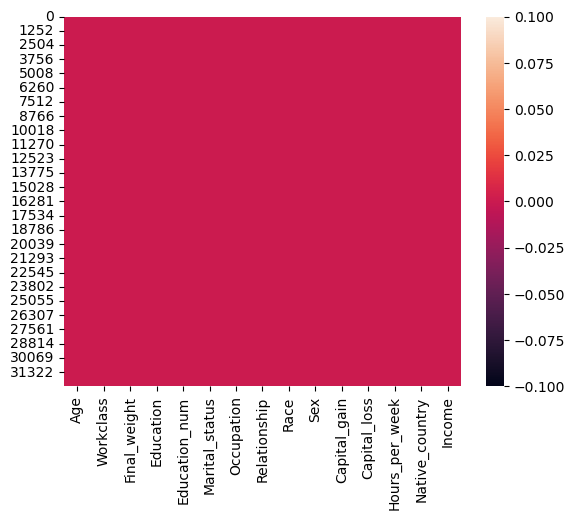

In [15]:
# Heatmap of null values

sns.heatmap(df.isnull())

There are no Null values in dataset

In [16]:
# checking number of unique values in each column

df.nunique()

Age                  73
Workclass             9
Final_weight      21648
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [17]:
# checking information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Final_weight    32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_num   32537 non-null  int64 
 5   Marital_status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital_gain    32537 non-null  int64 
 11  Capital_loss    32537 non-null  int64 
 12  Hours_per_week  32537 non-null  int64 
 13  Native_country  32537 non-null  object
 14  Income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


**Observation:**
   
Clean dataset with no missing values, featuring numeric and categorical data on individuals and income.

In [18]:
#lets Check the Value Columns of Each columns will using for loop

for a in df.columns:
    print(df[a].value_counts())

36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
203488    13
164190    13
123011    13
113364    12
148995    12
          ..
137952     1
169955     1
45487      1
183522     1
257302     1
Name: Final_weight, Length: 21648, dtype: int64
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: Education, dtype: int64
9     10494
10   

In [19]:
#Filling the Null Values

df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [20]:
# Clean up occupation column by removing any leading/trailing spaces

df['Occupation'] = df['Occupation'].str.strip()



# Replace occupation categories with new categories

df['New_occupation'] = df['Occupation'].replace({
    'Prof-specialty': 'Professional_Managerial',
    'Craft-repair': 'Skilled_Technical',
    'Exec-managerial': 'Professional_Managerial',
    'Adm-clerical': 'Sales_Administrative',
    'Sales': 'Sales_Administrative',
    'Other-service': 'Service_Care',
    'Machine-op-inspct': 'Skilled_Technical',
    'Missing': 'Unclassified Occupations',
    'Transport-moving': 'Skilled_Technical',
    'Handlers-cleaners': 'Service_Care',
    'Farming-fishing': 'Service_Care',
    'Tech-support': 'Skilled_Technical',
    'Protective-serv': 'Professional_Managerial',
    'Priv-house-serv': 'Service_Care',
    'Armed-Forces': 'Unclassified Occupations',
})

# Check value counts of new occupation column

df.drop(['Occupation'], axis=1,inplace=True)
print(f"New narrowed categories : \n{df['New_occupation'].value_counts()}")

New narrowed categories : 
Professional_Managerial     8850
Skilled_Technical           8618
Sales_Administrative        7418
Service_Care                5799
?                           1843
Unclassified Occupations       9
Name: New_occupation, dtype: int64


In [21]:
# Statistics of dataset

df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


**Statistical Overview:**

Age: Mean age is 38.59, ranging from 17 to 90 years, showing a balanced distribution.
    
Final_weight: Mean final weight is 189,780, with a wide range of values (12,285 to 1,484,705).
    
Education_num: Mean education number is 10.08, ranging from 1 to 16, likely representing years of education.
    
Capital_gain: Mean capital gain is 1,078.44, mostly zero but with outliers up to 99,999.
    
Capital_loss: Mean capital loss is 87.37, mostly zero with outliers up to 4,356.
    
Hours_per_week: Mean hours worked per week is 40.44, with a typical distribution (1 to 99 hours).
    
Income: Mean income suggests 24.09% above the threshold.

**Key Observations:**

Age Distribution: Diverse, spanning 17 to 90 years.
    
Capital Gain/Loss: Substantial zero values, but notable outliers.
    
Income Distribution: Imbalanced, with a majority below the threshold.
    
Education Number: Likely represents years of education.
    
Hours Worked: Typical pattern, with most around 40 hours per week.
    
These insights provide a preliminary understanding of the dataset's numeric features, highlighting areas for further analysis.

In [22]:
#Dropping the Education as it doent affect the Analysis

df.drop(['Education'], axis=1,inplace=True)

In [23]:
#Checking Skewness

skewness = df.skew()
skewness

Age                0.557663
Final_weight       1.447703
Education_num     -0.309500
Capital_gain      11.949403
Capital_loss       4.592702
Hours_per_week     0.228759
Income             1.211687
dtype: float64

In [24]:
#Seperating Categorical And Numerical Columns

Categorical = []
Numerical = []
for i in df.columns:
    if df[i].dtypes == "O":
        Categorical.append(i)
    else:
        Numerical.append(i)
    

In [25]:
 print('These are the Categorical columns',Categorical,
       
       
       'and these are the Numerical Columns',Numerical)

These are the Categorical columns ['Workclass', 'Marital_status', 'Relationship', 'Race', 'Sex', 'Native_country', 'New_occupation'] and these are the Numerical Columns ['Age', 'Final_weight', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']


# Data Visualization

Lets Compare one by one with all

lets go with **Workclass**

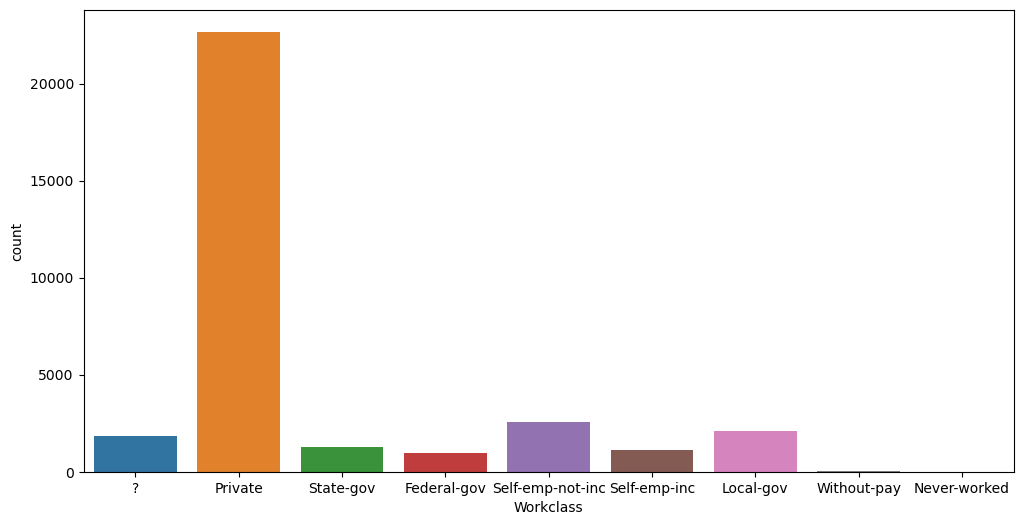

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass', data=df)
plt.show()

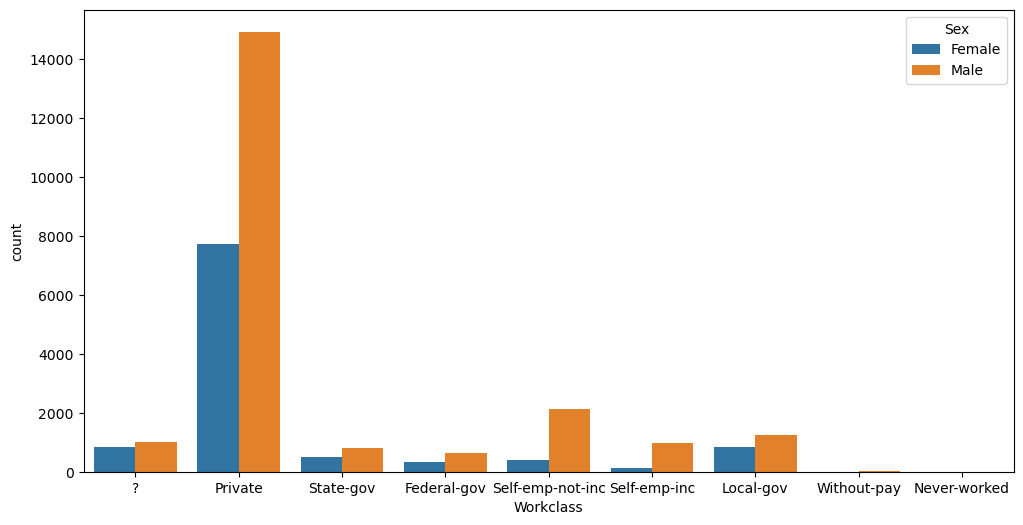

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass',hue='Sex',data=df)
plt.show()

**Observation:**

Federal-gov:
Male: 645 individuals
Female: 315 individual
    
Local-gov:
Male: 1,258 individuals
Female: 835 individuals
    
Never-worked:
Male: 5 individuals
Female: 2 individuals
    
Private:
Male: 15,927 individuals
Female: 8,582 individuals
    
Self-emp-inc:
Male: 981 individuals
Female: 135 individual
    
Self-emp-not-inc:
Male: 2,141 individuals
Female: 399 individuals
    
State-gov:
Male: 809 individuals
Female: 489 individuals
    
Without-pay:
Male: 9 individuals
Female: 5 individuals
    
This breakdown provides insights into gender distribution across different workclass categories, detailing the number of males and females in each. Notably, the 'Private' workclass exhibits a substantial presence of both genders, while the 'Self-emp-inc' workclass has a higher proportion of males.

**Marital_status**

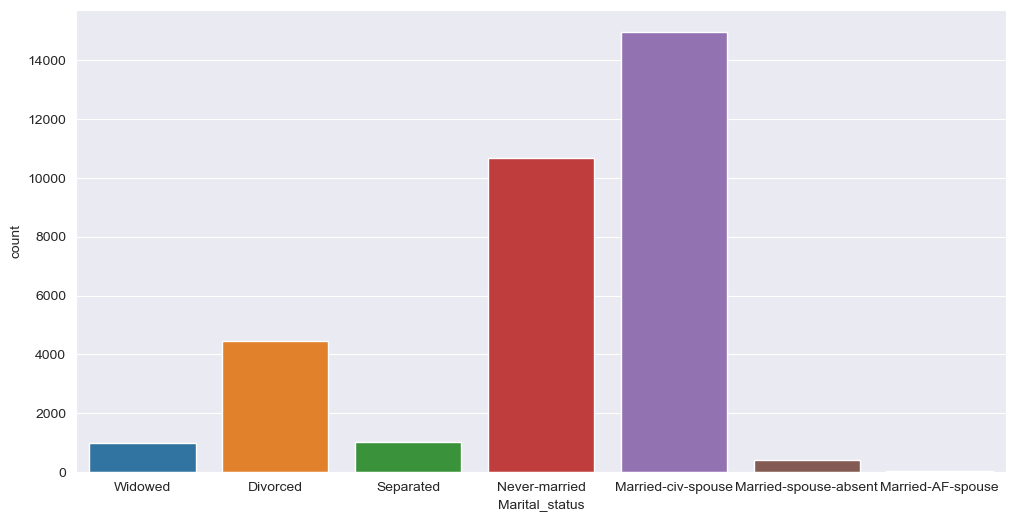

In [28]:

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.countplot(x='Marital_status', data=df)
plt.show()

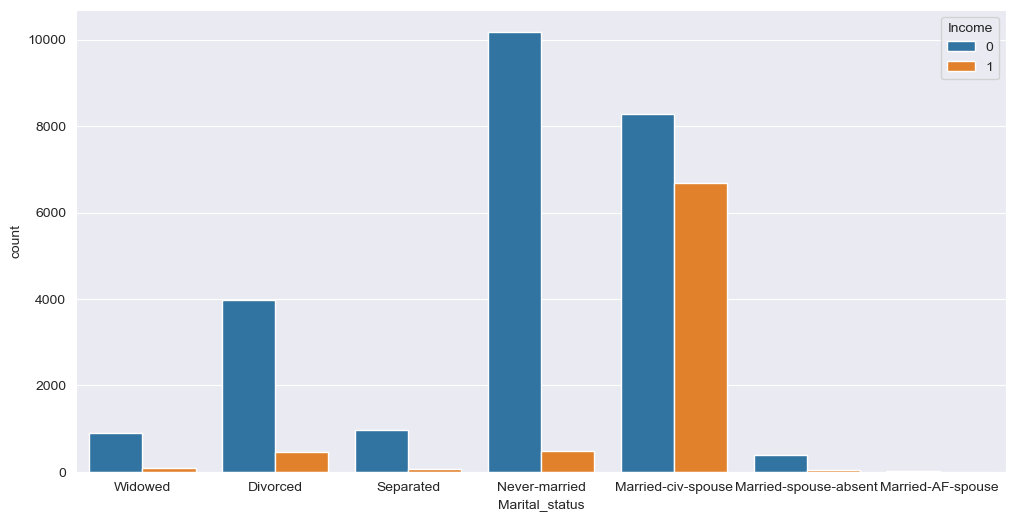

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.show()

**Relationship**

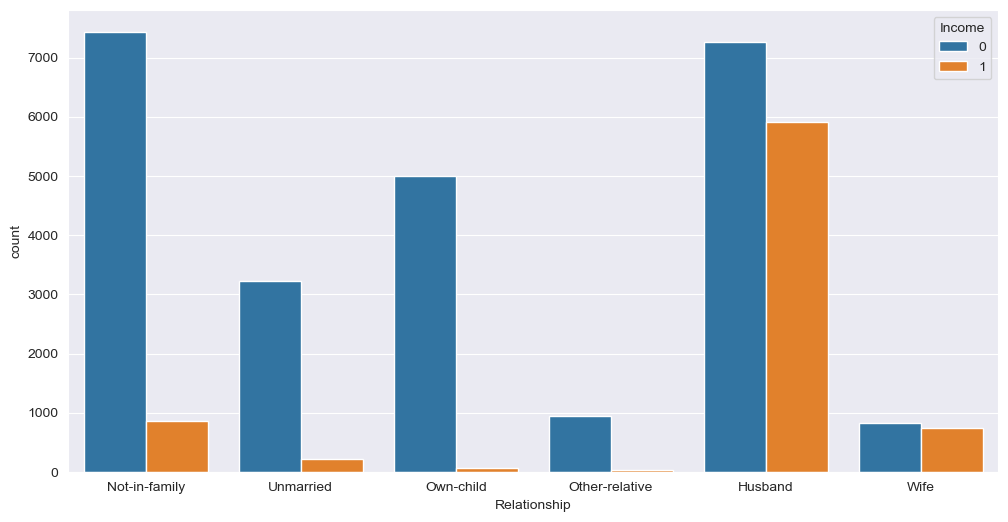

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.show()

**Race**

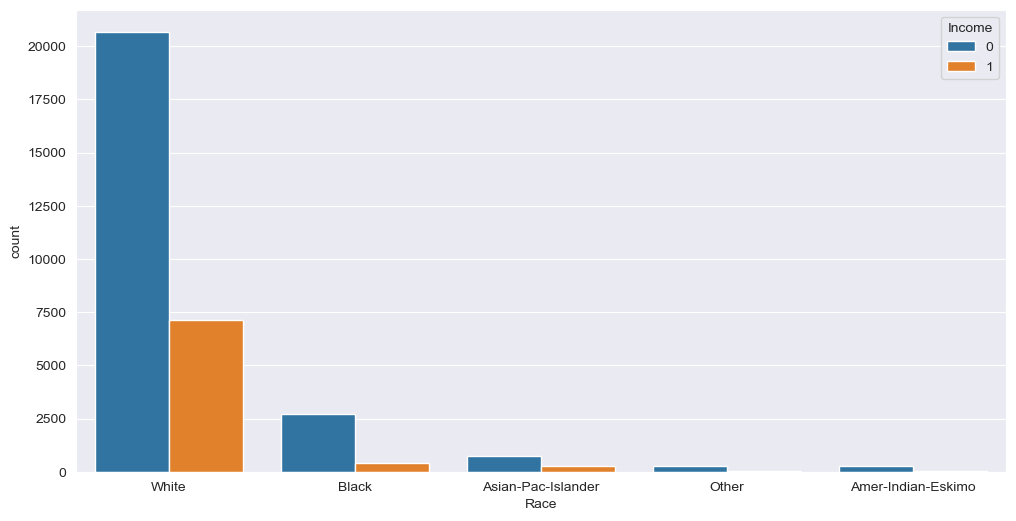

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Race',hue='Income',data=df)
plt.show()

**Sex**

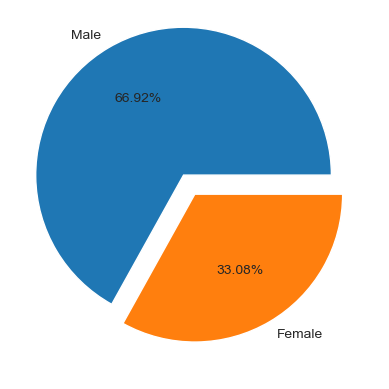

In [32]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


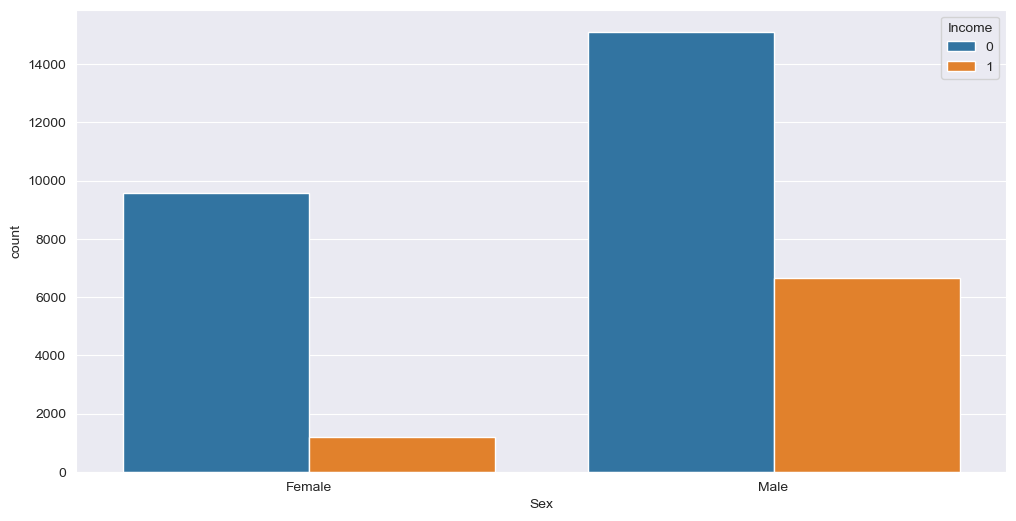

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex',hue='Income',data=df)
plt.show()

**Native_country**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, '?'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'Greece'),
  Text(4, 0, 'Vietnam'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Taiwan'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Trinadad&Tobago'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'South'),
  Text(12, 0, 'Holand-Netherlands'),
  Text(13, 0, 'Puerto-Rico'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Iran'),
  Text(16, 0, 'England'),
  Text(17, 0, 'Germany'),
  Text(18, 0, 'Italy'),
  Text(19, 0, 'Japan'),
  Text(20, 0, 'Hong'),
  Text(21, 0, 'Honduras'),
  Text(22, 0, 'Cuba'),
  Text(23, 0, 'Ireland'),
  Text(24, 0, 'Cambodia'),
  Text(25, 0, 'Peru'),
  Text(26, 0, 'Nicaragua'),
  Text(27, 0, 'Dominican-Republic'),
  Text(28, 0, 'Haiti'),
  Text(29, 0, 'El-Salvador'),
  Text(30, 0, 'Hung

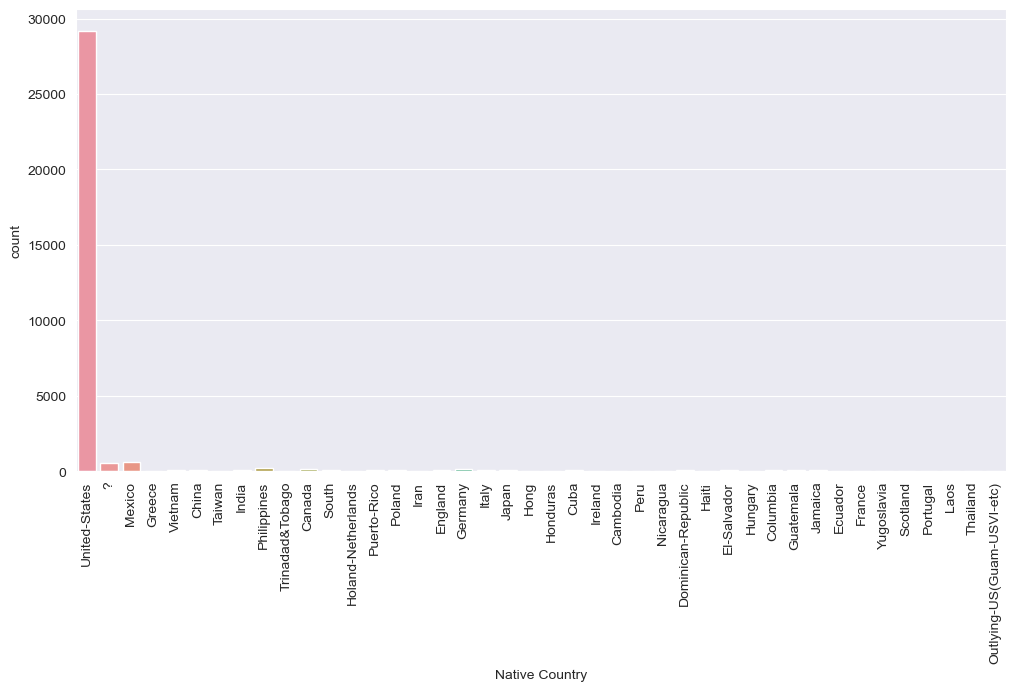

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Native_country', data=df)
plt.xlabel("Native Country")
plt.xticks(rotation=90)

**Age**

<Axes: xlabel='Age', ylabel='Density'>

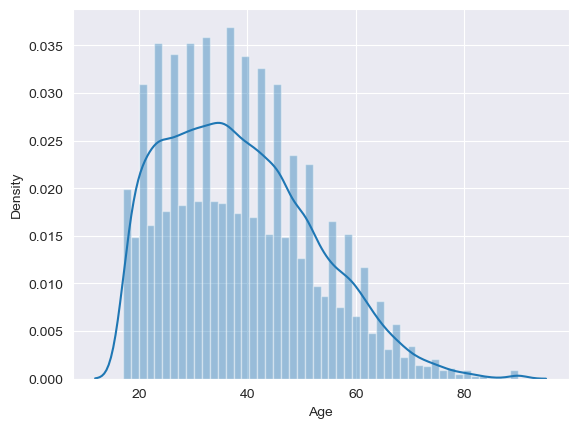

In [35]:
sns.distplot(df['Age'])

Text(0.5, 1.0, 'Income Distribution by Age')

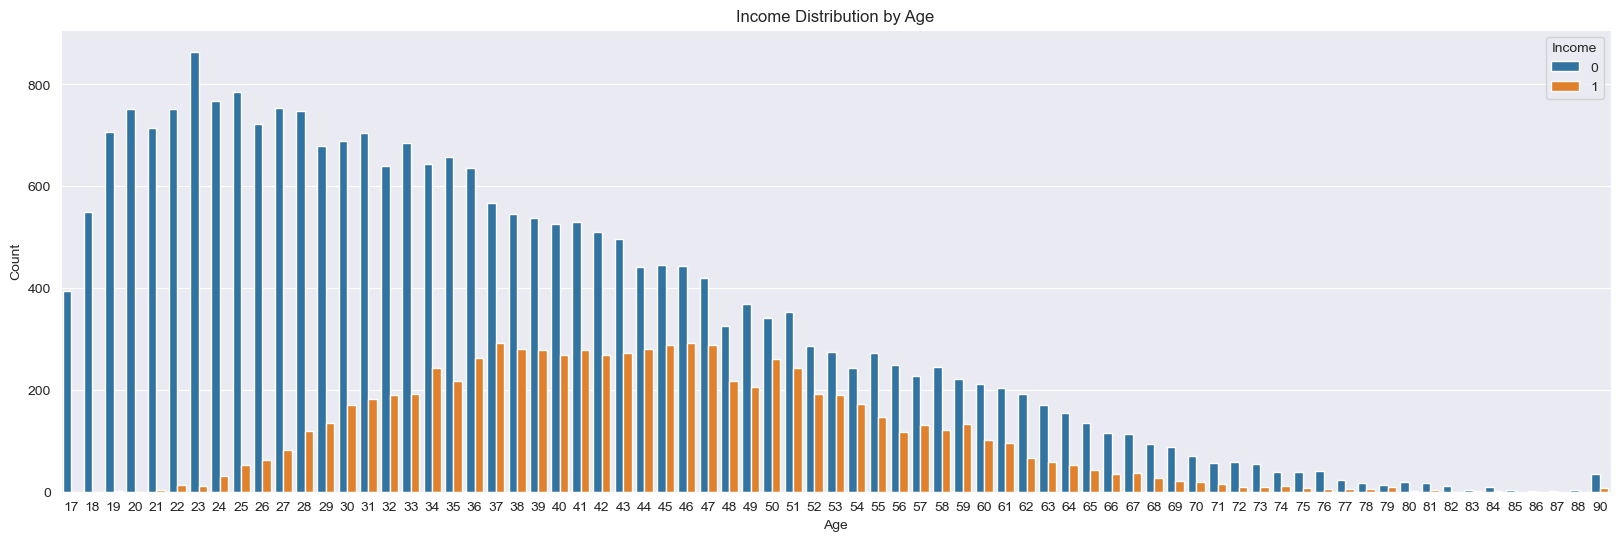

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', hue='Income', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Income Distribution by Age')

**Final_weight**

<Axes: xlabel='Final_weight', ylabel='Density'>

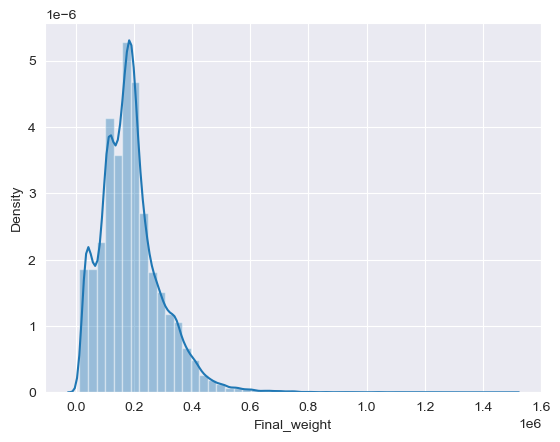

In [37]:
sns.distplot(df['Final_weight'])

**New_occupation**

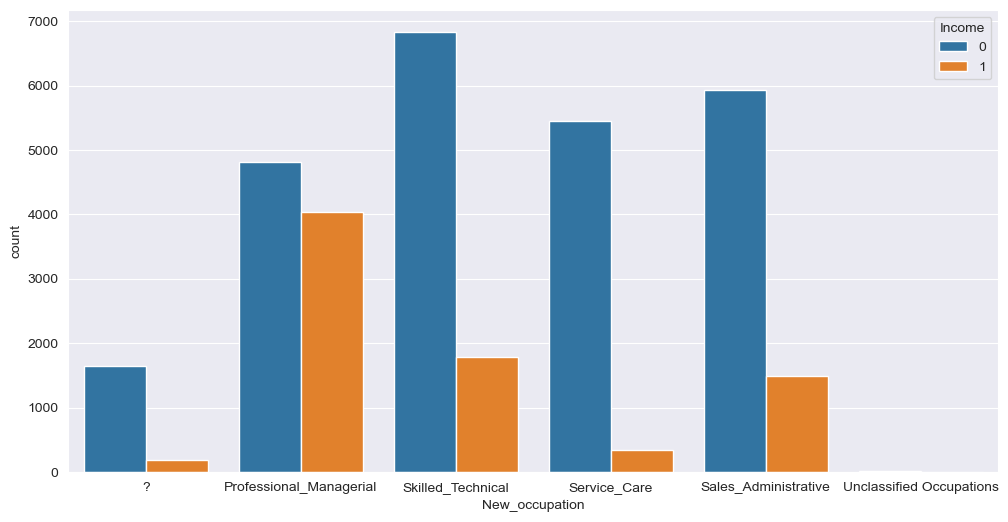

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='New_occupation',hue='Income',data=df)
plt.show()

**Education_num**

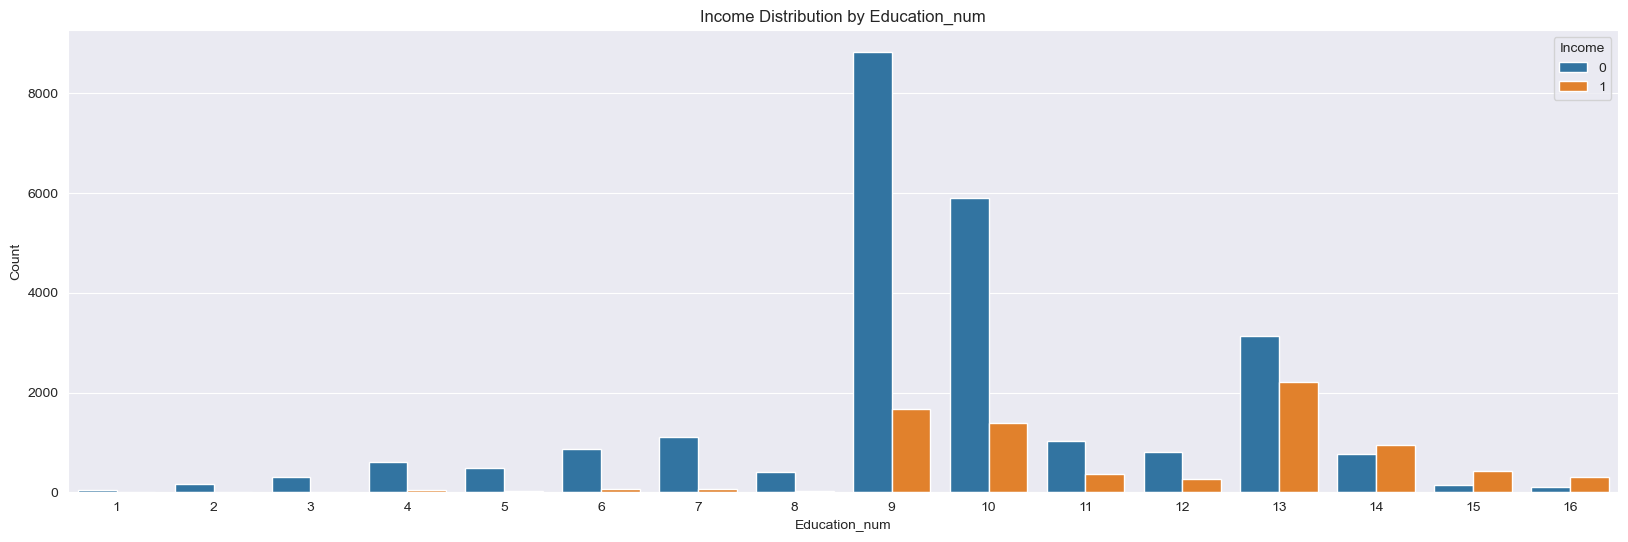

In [39]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Education_num', hue='Income', data=df)
plt.xlabel('Education_num')
plt.ylabel('Count')
plt.title('Income Distribution by Education_num')
plt.show()

**Hours_per_week**

<Axes: xlabel='Hours_per_week', ylabel='Density'>

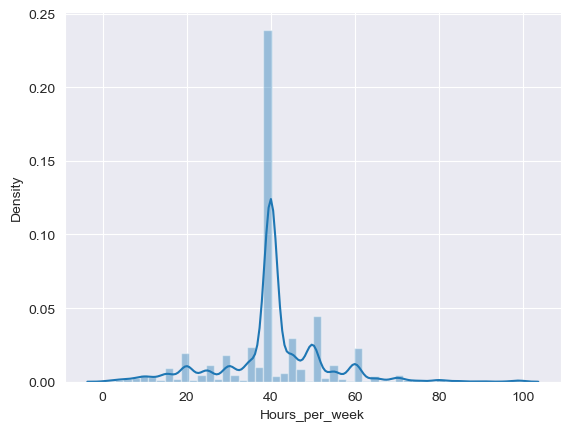

In [40]:
sns.distplot(df['Hours_per_week'])

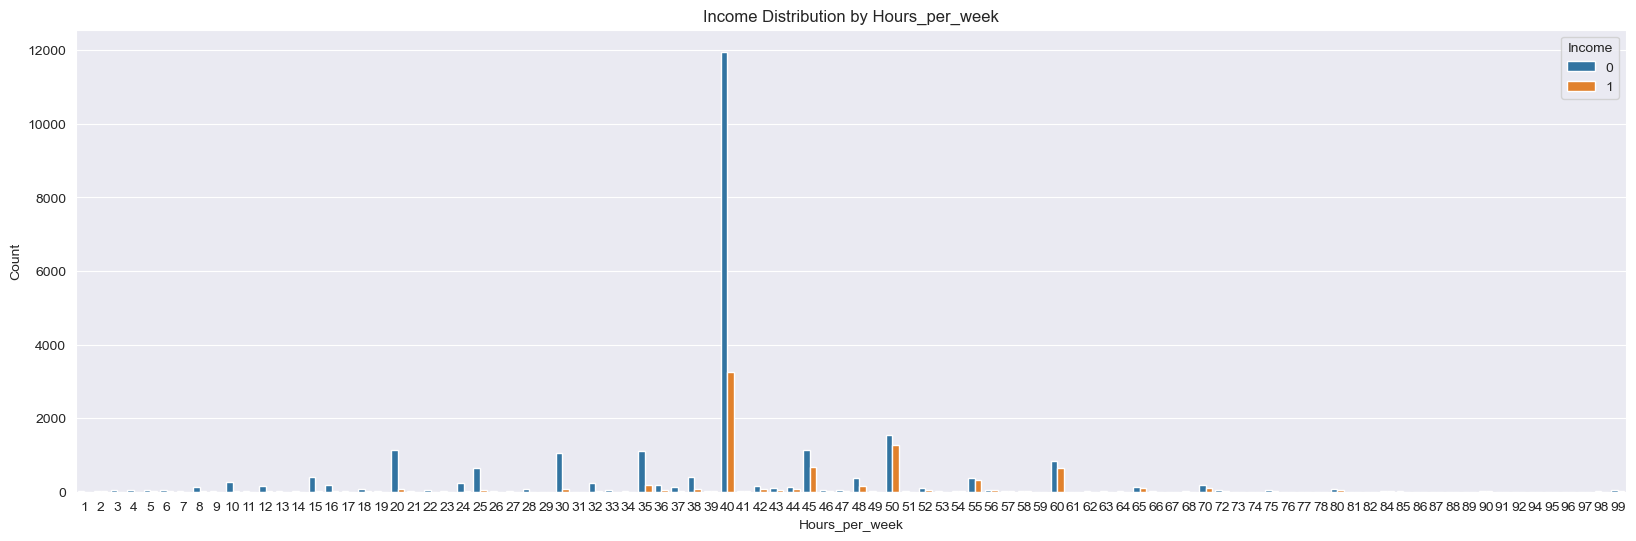

In [41]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Hours_per_week', hue='Income', data=df)
plt.xlabel('Hours_per_week')
plt.ylabel('Count')
plt.title('Income Distribution by Hours_per_week')
plt.show()

**Income**

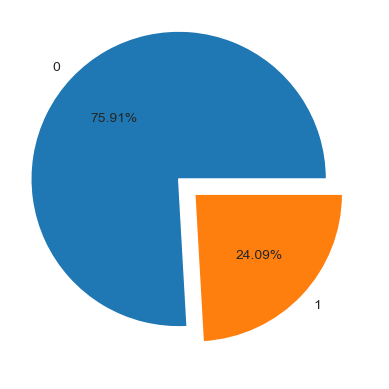

In [42]:
plt.pie(df['Income'].value_counts().values,labels=df['Income'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


**Distribution plot for Seeing Data Distribution**

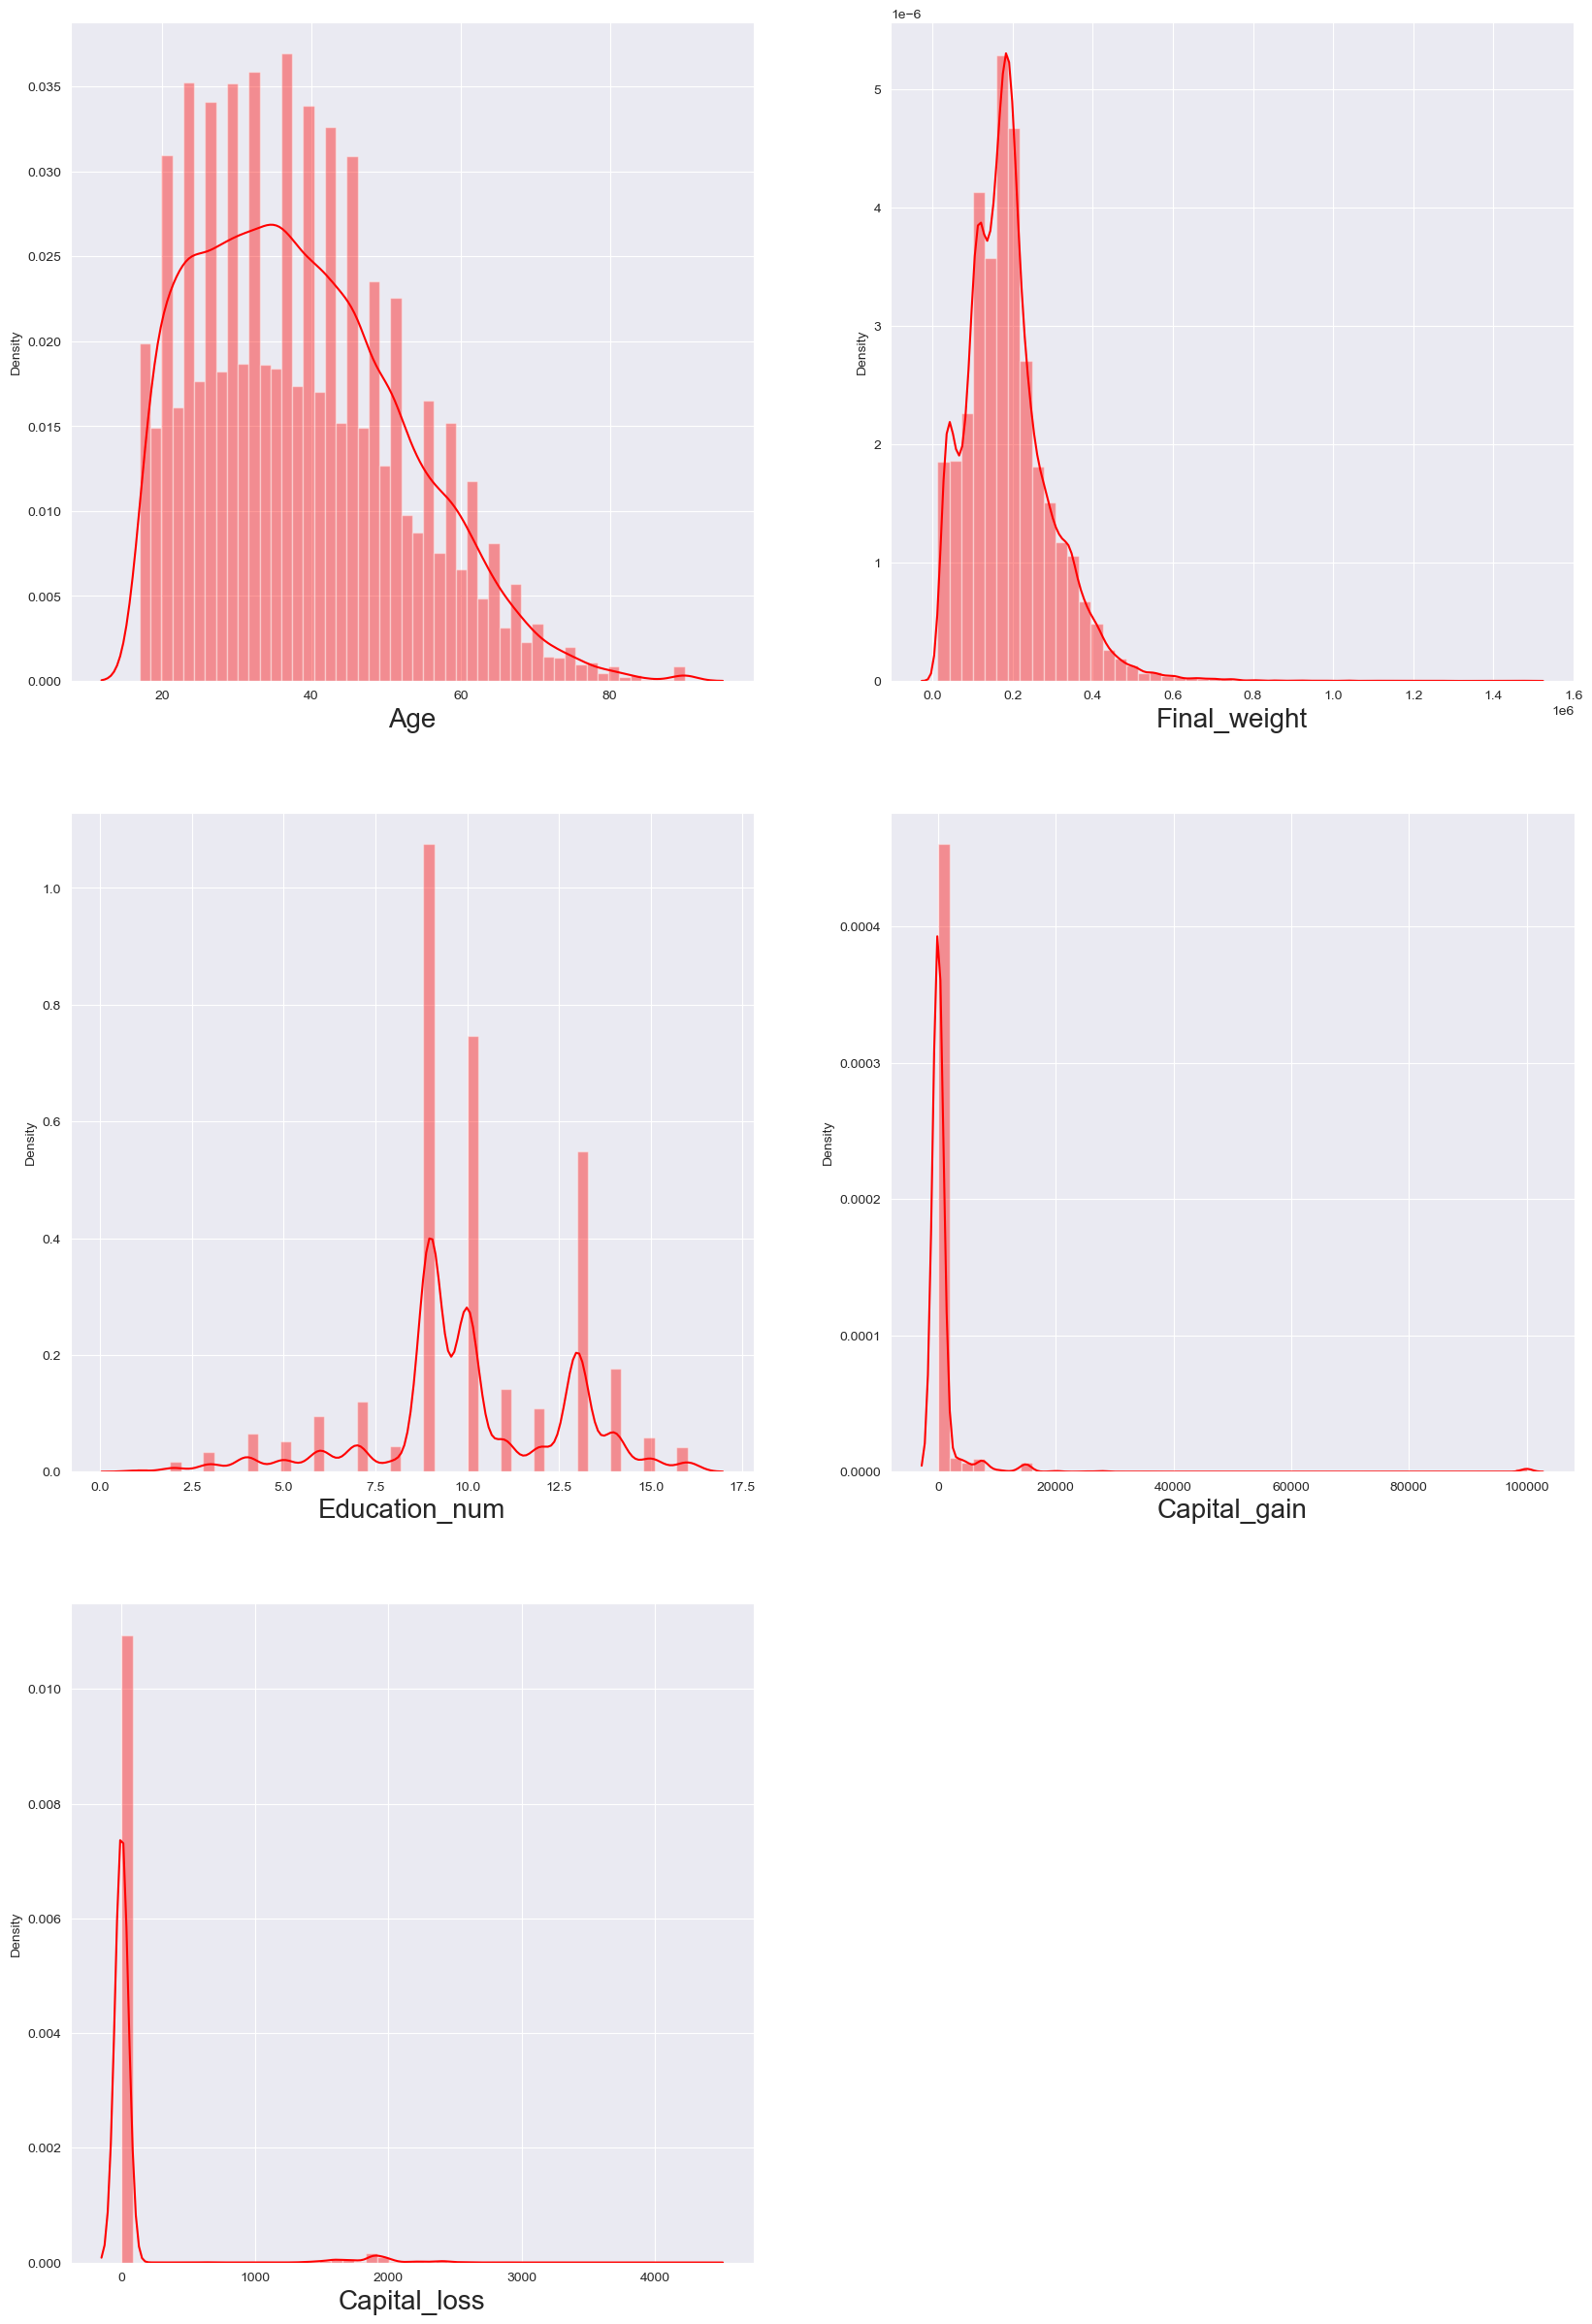

In [43]:
plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'red')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

**Outliers with box Plot**

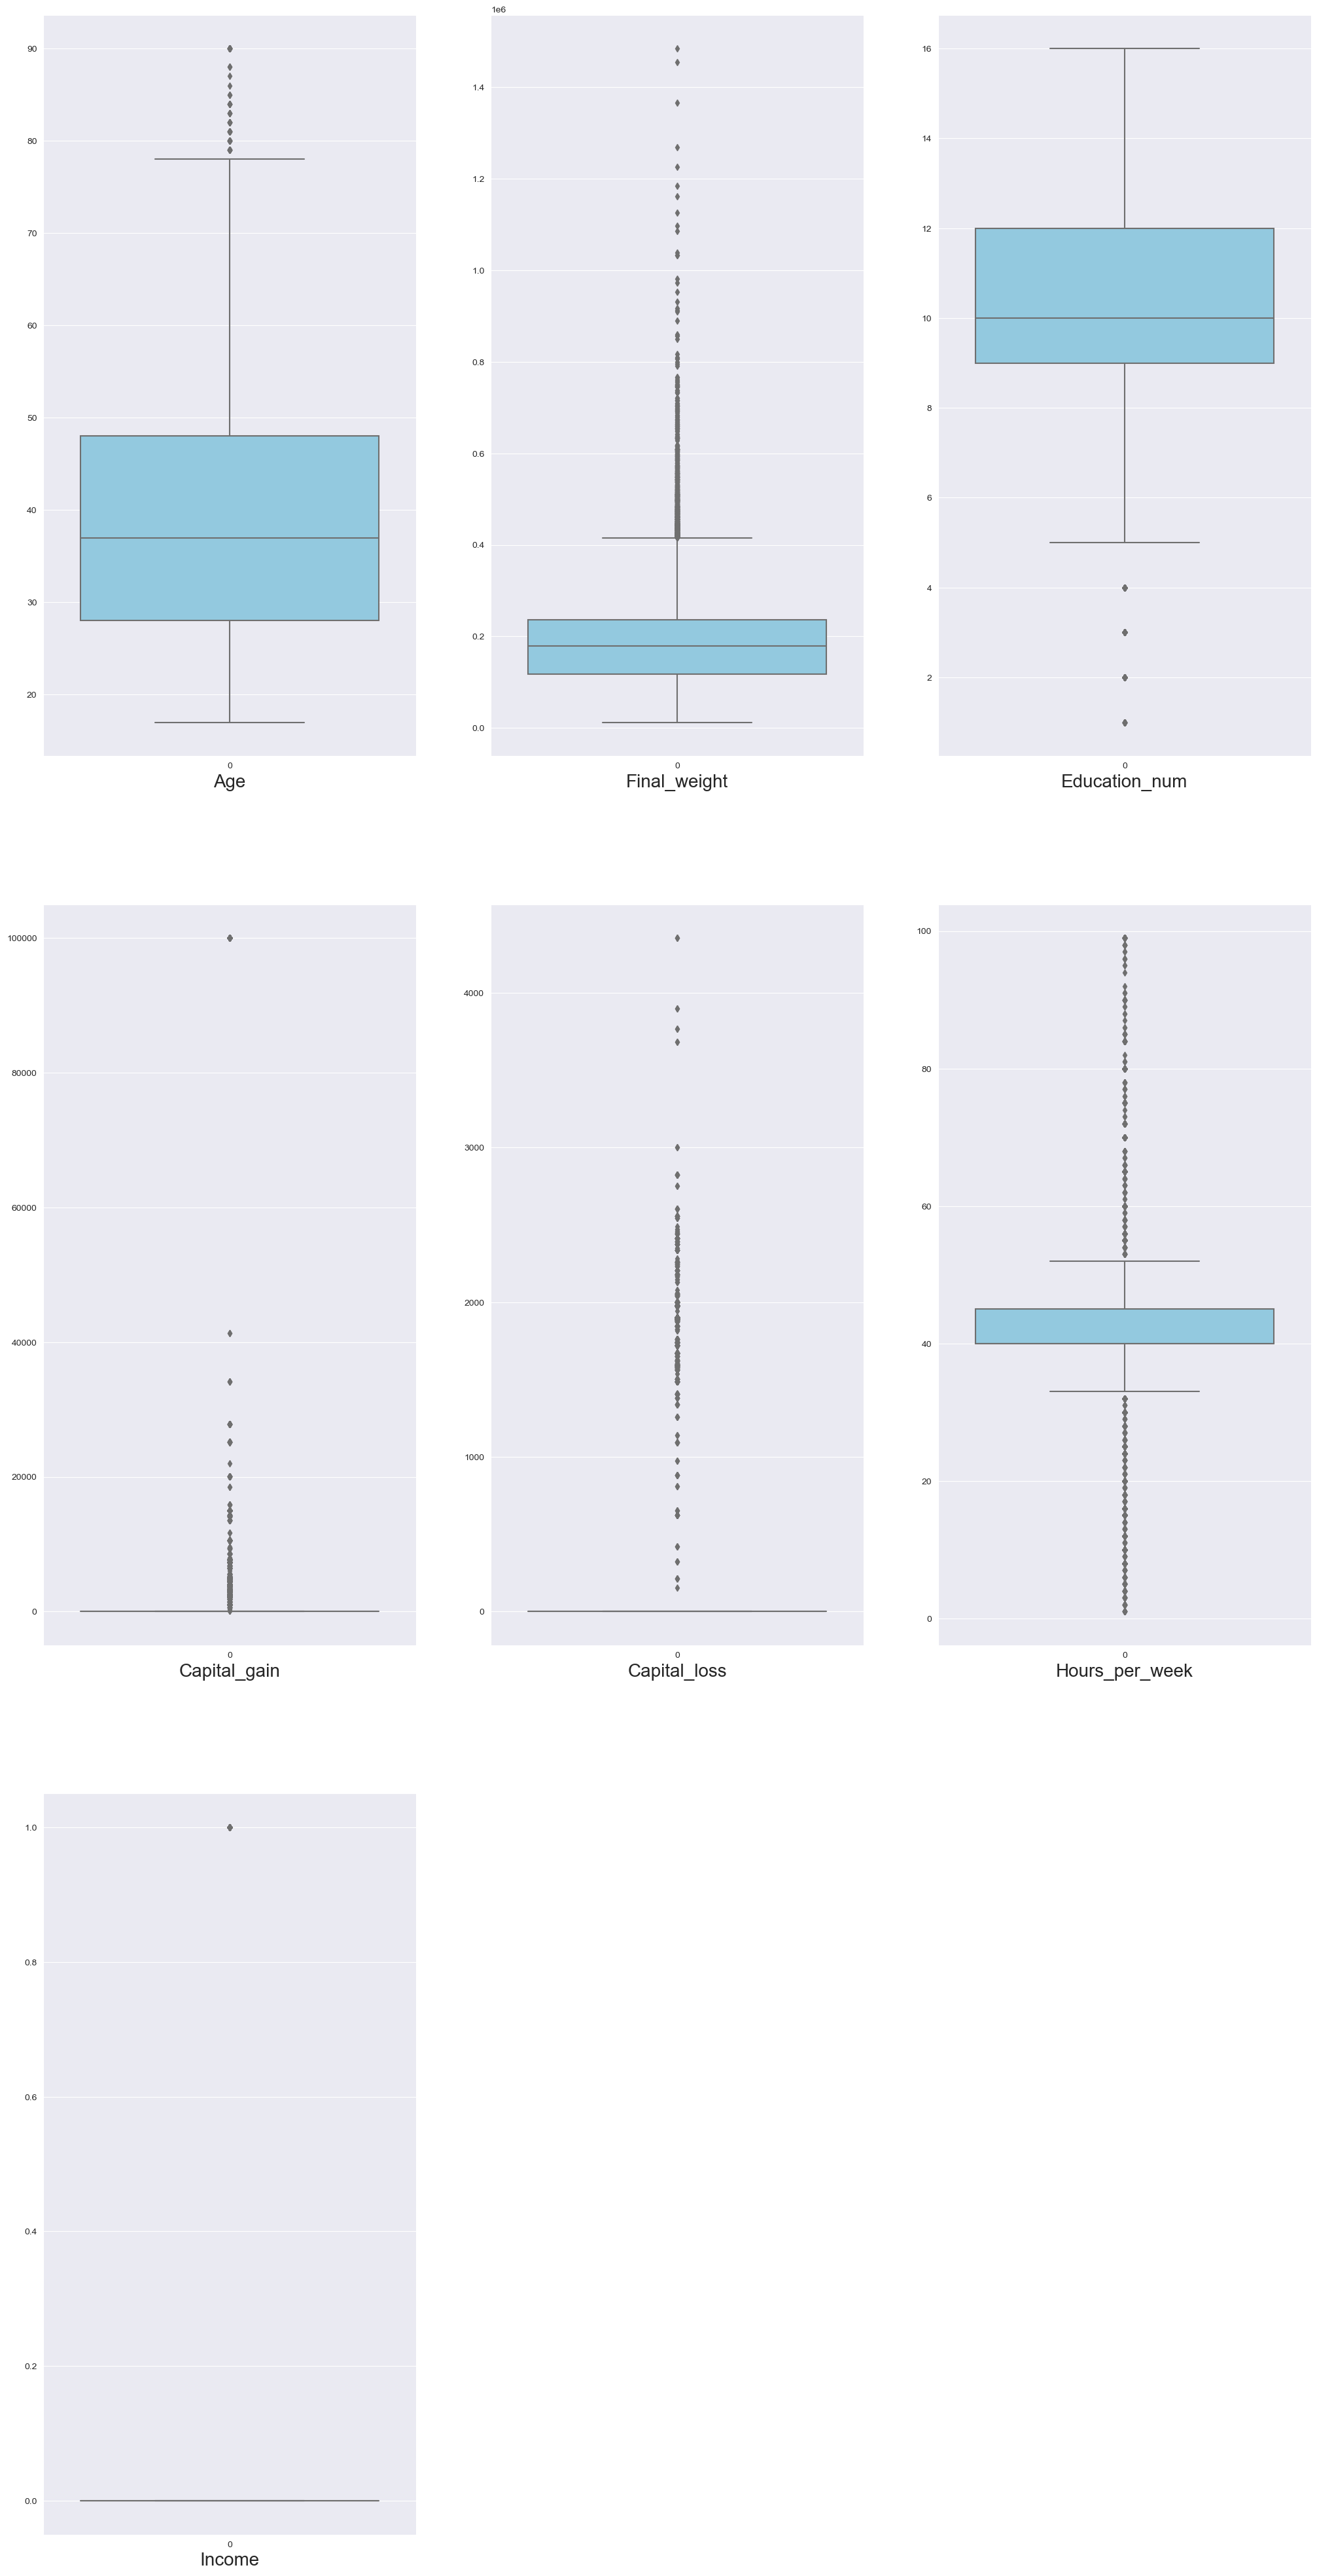

In [44]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in Numerical:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

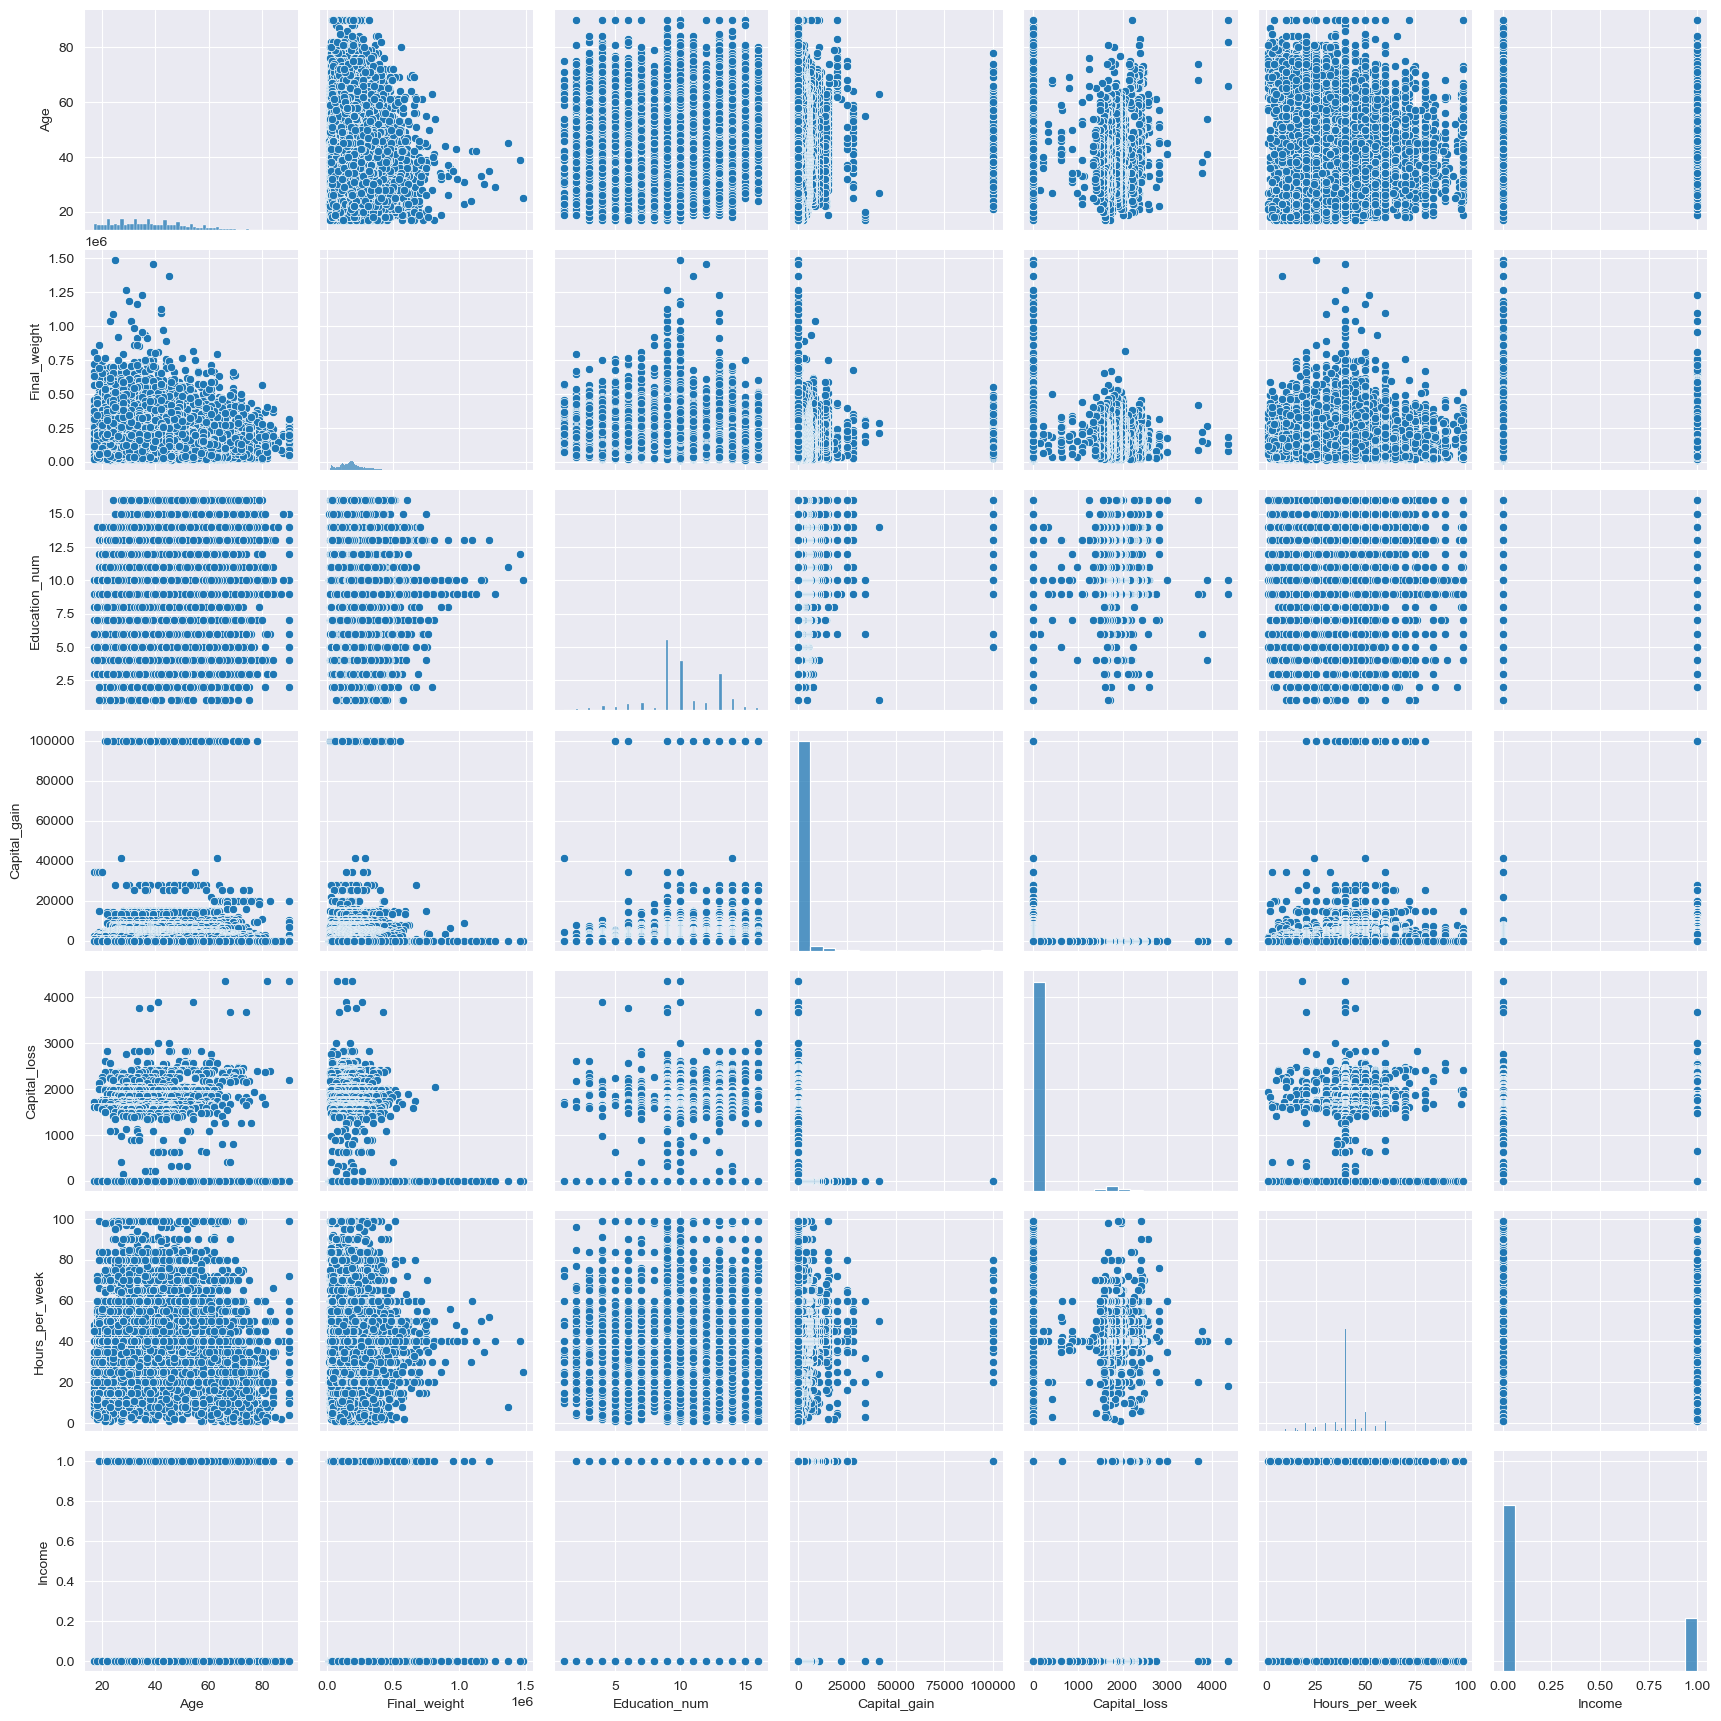

In [45]:
#Pairplot   #Multivariate Analysis

sns.pairplot(df)

# Cleaning Data

**1.Encoding the categorical columns using Label Encoding**

In [46]:
categorical_col  =['Workclass',
 'Marital_status',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'New_occupation']


LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)


df

,Age,Workclass,Final_weight,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
0,90,0,77053,9,6,1,4,0,0,4356,40,39,0,0
1,82,4,132870,9,6,1,4,0,0,4356,18,39,0,1
2,66,0,186061,10,6,4,2,0,0,4356,40,39,0,0
3,54,4,140359,4,0,4,4,0,0,3900,40,39,0,4
4,41,4,264663,10,5,3,4,0,0,3900,40,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,10,4,1,4,1,0,0,40,39,0,1
32557,27,4,257302,12,2,5,4,0,0,0,38,39,0,4
32558,40,4,154374,9,2,0,4,1,0,0,40,39,1,4
32559,58,4,151910,9,6,4,4,0,0,0,40,39,0,2


In [47]:
#removing the outliers with zscore

columns = df[['Age','Capital_gain','Capital_loss','Final_weight','Native_country','Hours_per_week']]

z=np.abs(zscore(columns))
z

,Age,Capital_gain,Capital_loss,Final_weight,Native_country,Hours_per_week
0,3.770003,0.145975,10.589625,1.067955,0.291335,0.035664
1,3.183397,0.145975,10.589625,0.539159,0.291335,1.817516
2,2.010185,0.145975,10.589625,0.035241,0.291335,0.035664
3,1.130276,0.145975,9.458380,0.468210,0.291335,0.035664
4,0.177041,0.145975,9.458380,0.709415,0.291335,0.035664
...,...,...,...,...,...,...
32556,1.216148,0.145975,0.216743,1.140366,0.291335,0.035664
32557,0.849519,0.145975,0.216743,0.639678,0.291335,0.197650
32558,0.103716,0.145975,0.216743,0.335436,0.291335,0.035664
32559,1.423579,0.145975,0.216743,0.358779,0.291335,0.035664


In [48]:
Threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 32536, 32536, 32536], dtype=int64), array([1, 3, 4, ..., 3, 4, 5], dtype=int64))


In [49]:
df= df[(z<3).all(axis=1)]
df

,Age,Workclass,Final_weight,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,New_occupation
1470,62,2,159908,13,2,5,4,0,0,1258,38,39,0,2
1471,72,2,144515,16,2,0,4,1,0,1258,40,39,0,1
1472,76,0,224680,15,2,0,4,1,0,1258,20,39,0,0
1473,66,4,350498,10,2,0,4,1,0,1258,20,39,0,4
1474,33,2,262042,9,0,3,4,0,0,1138,40,39,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,10,4,1,4,1,0,0,40,39,0,1
32557,27,4,257302,12,2,5,4,0,0,0,38,39,0,4
32558,40,4,154374,9,2,0,4,1,0,0,40,39,1,4
32559,58,4,151910,9,6,4,4,0,0,0,40,39,0,2


In [50]:
#Data Loss

raw_rows = 32537  
new_rows = 28978 

data_loss = ((raw_rows - new_rows) / raw_rows) * 100

print("Data Loss Percentage:",data_loss,"%")

Data Loss Percentage: 10.938316378277039 %


In [51]:
#Checking the Correlation of Columns with Heatmap

df_corr=df.corr()

<Axes: >

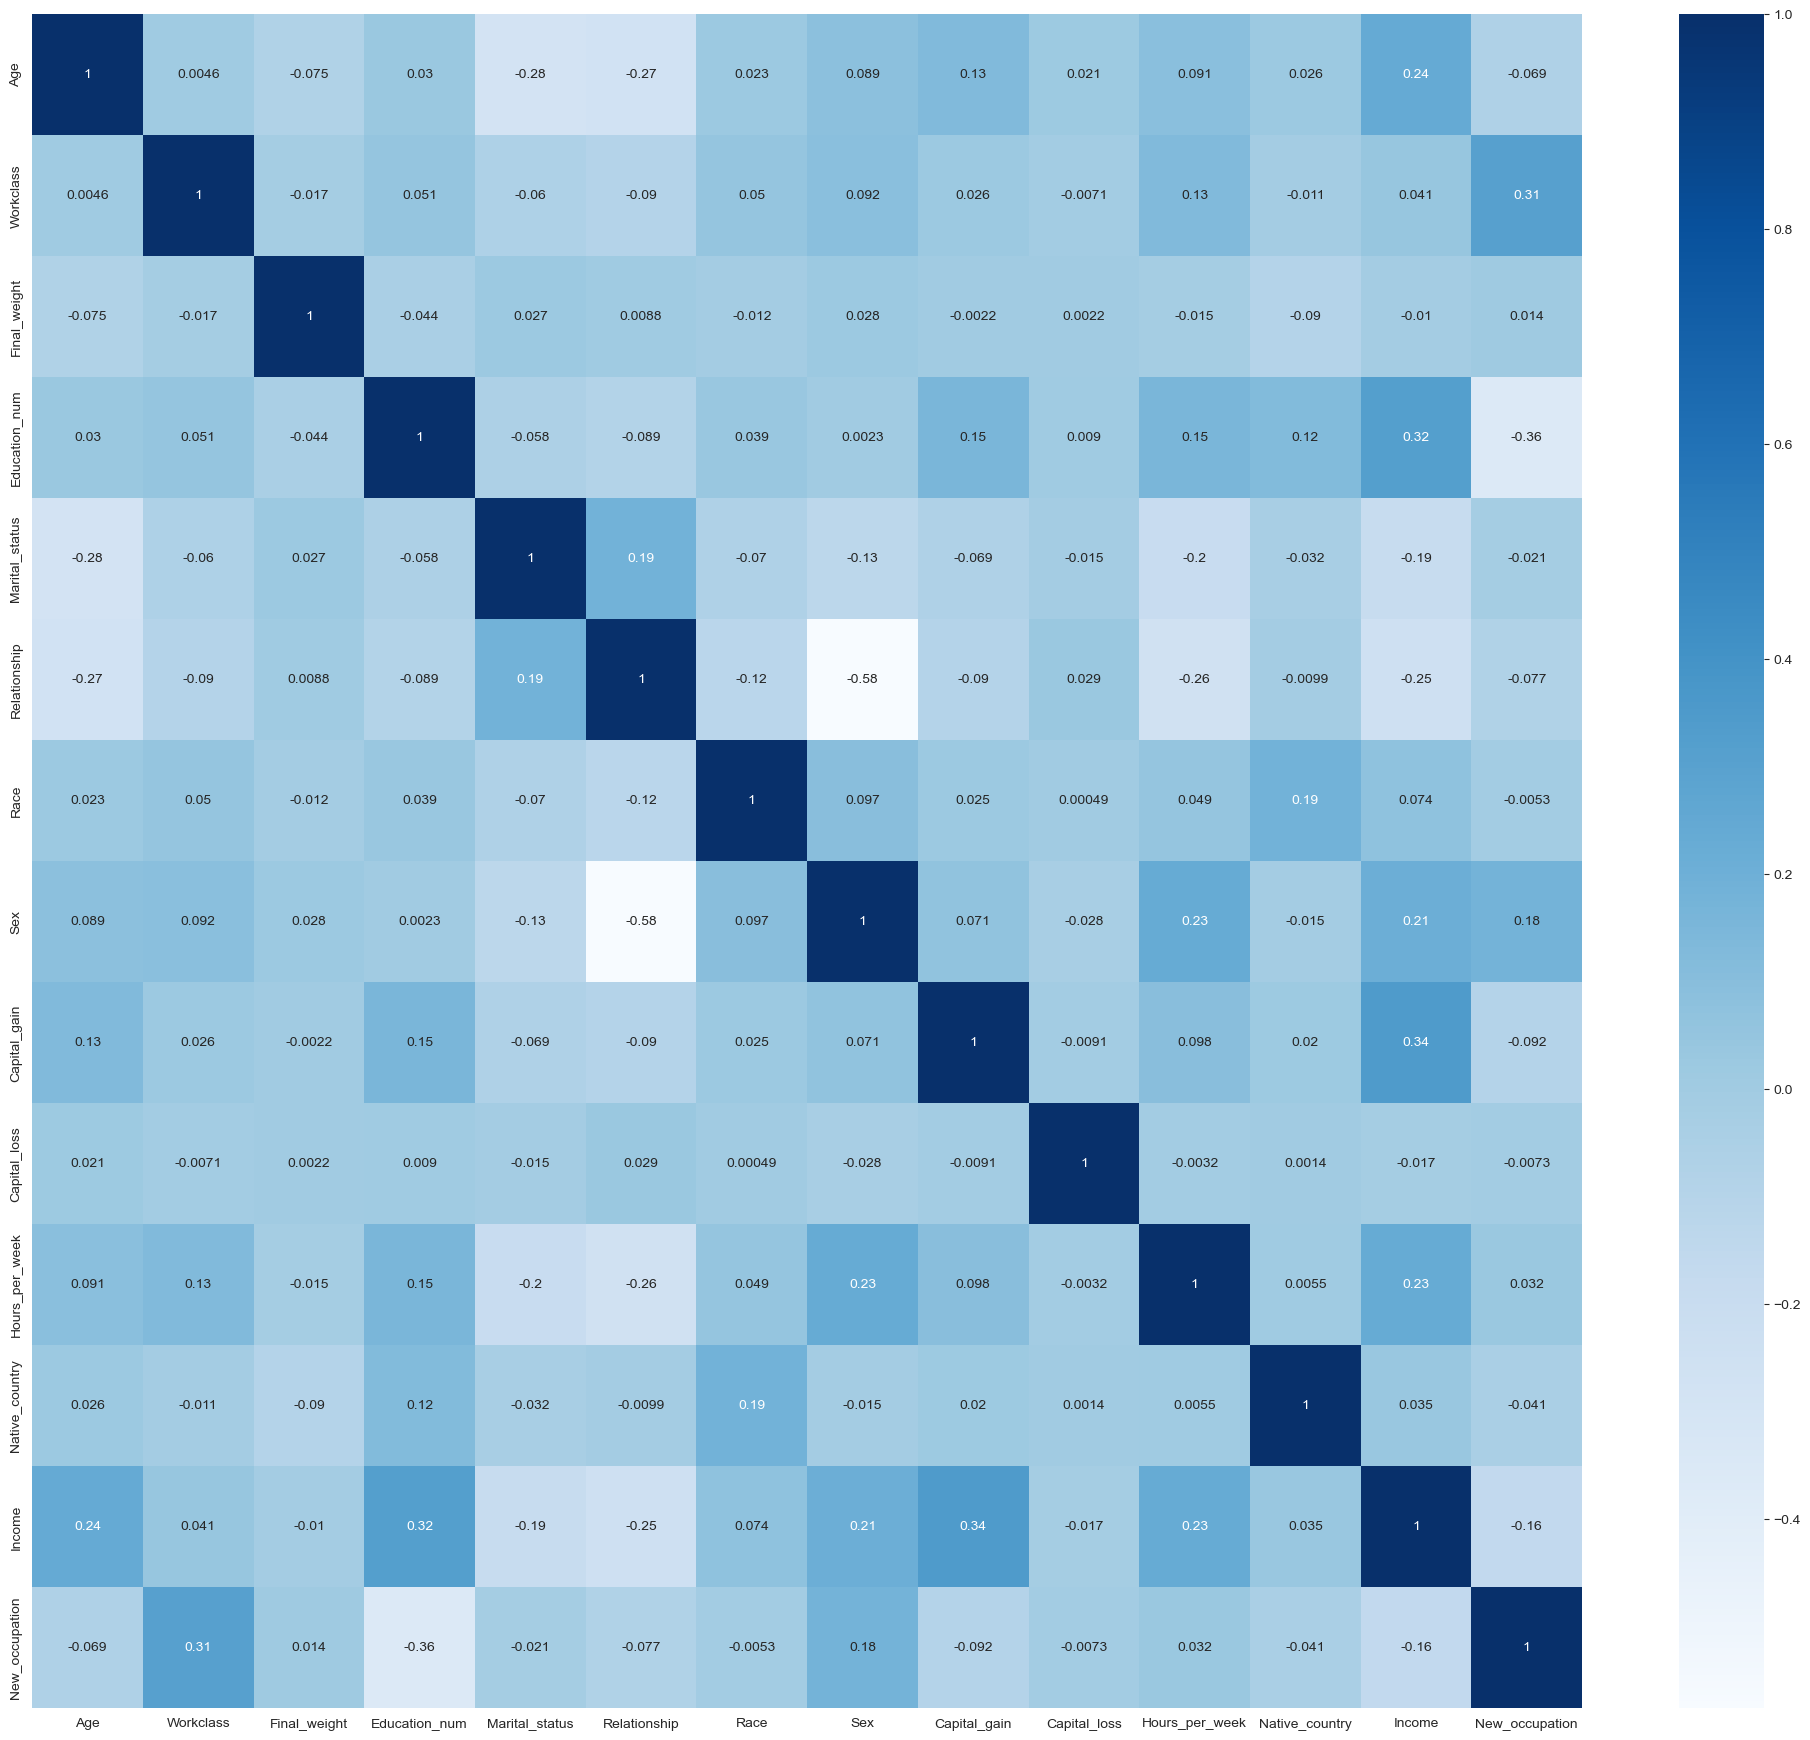

In [52]:
plt.figure(figsize=(25,22))
sns.heatmap(df_corr,cmap='Blues',annot=True)

In [53]:
#Checking correlation with output

correlation_with_quality = df.corr()['Income'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Income            1.000000
Capital_gain      0.342761
Education_num     0.317882
Relationship      0.246400
Age               0.237549
Hours_per_week    0.233451
Sex               0.209611
Marital_status    0.193876
New_occupation    0.160770
Race              0.074156
Workclass         0.041291
Native_country    0.034801
Capital_loss      0.016589
Final_weight      0.010230
Name: Income, dtype: float64


In [54]:
df.drop(columns = ['Final_weight','Workclass','Capital_loss'],axis=1,inplace=True)

In [55]:
#Checking the correlation 

df_corr = df.corr()
df_corr

,Age,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income,New_occupation
Age,1.000000,0.030156,-0.284074,-0.269309,0.023206,0.088748,0.128523,0.090872,0.026328,0.237549,-0.068698
Education_num,0.030156,1.000000,-0.058311,-0.088824,0.038735,0.002335,0.154896,0.153826,0.123350,0.317882,-0.358639
Marital_status,-0.284074,-0.058311,1.000000,0.185892,-0.070492,-0.126198,-0.069352,-0.199233,-0.031914,-0.193876,-0.020691
Relationship,-0.269309,-0.088824,0.185892,1.000000,-0.123014,-0.575434,-0.090331,-0.258603,-0.009950,-0.246400,-0.076763
Race,0.023206,0.038735,-0.070492,-0.123014,1.000000,0.097431,0.024803,0.049201,0.185354,0.074156,-0.005323
Sex,0.088748,0.002335,-0.126198,-0.575434,0.097431,1.000000,0.070717,0.234780,-0.014855,0.209611,0.181021
Capital_gain,0.128523,0.154896,-0.069352,-0.090331,0.024803,0.070717,1.000000,0.098465,0.020421,0.342761,-0.091679
Hours_per_week,0.090872,0.153826,-0.199233,-0.258603,0.049201,0.234780,0.098465,1.000000,0.005460,0.233451,0.032392
Native_country,0.026328,0.123350,-0.031914,-0.009950,0.185354,-0.014855,0.020421,0.005460,1.000000,0.034801,-0.040511
Income,0.237549,0.317882,-0.193876,-0.246400,0.074156,0.209611,0.342761,0.233451,0.034801,1.000000,-0.160770


In [56]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [57]:
features_to_drop

set()

**VIF**

In [58]:
df1=df.copy()

df1.drop('Income',axis=1, inplace=True)

#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [59]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [60]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Age,1.181563
1,Education_num,1.228677
2,Marital_status,1.137999
3,Relationship,1.668420
4,Race,1.056039
5,Sex,1.571475
6,Capital_gain,1.050623
7,Hours_per_week,1.140053
8,Native_country,1.052721
9,New_occupation,1.210013


There is no Multicollinearty, dataset is ready for model testing

#    Splitting into Feature and Target column

In [61]:
X= df.drop('Income', axis=1)
Y=df['Income']

In [62]:
print('X xhape',X.shape)
print('y Shape',Y.shape)

X xhape (28632, 10)
y Shape (28632,)


**Standardization**

In [63]:
sc=StandardScaler()

X=sc.fit_transform(X)

**Data Balancing**

In [64]:
sm=SMOTE()

x,y=sm.fit_resample(X,Y)

x.shape , y.shape

((44536, 10), (44536,))

# Model Training

In [65]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.778176919622811 on Random State = 7


In [66]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

**Defining All Classification Models**

In [67]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [68]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('----'*30)


Accuracy_Score of  LogisticRegression() is 77.8176919622811
Confusion Matrix of  LogisticRegression()  is 
 [[3472 1003]
 [ 973 3460]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4475
           1       0.78      0.78      0.78      4433

    accuracy                           0.78      8908
   macro avg       0.78      0.78      0.78      8908
weighted avg       0.78      0.78      0.78      8908

------------------------------------------------------------------------------------------------------------------------
Accuracy_Score of  RidgeClassifier() is 77.32375392905254
Confusion Matrix of  RidgeClassifier()  is 
 [[3400 1075]
 [ 945 3488]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4475
           1       0.76      0.79      0.78      4433

    accuracy                           0.77      8908
   macro avg       0.77      0.77      0.77      8908
weighted avg   

**CrossValidation**

In [69]:
for A in model:
    print('Accuracy_Score of ',A, 'is', accuracy_score(y_test,A.predict(x_test))*100)
    print("cross Validation accuracy score of ",A ," is ",cross_val_score(A,x,y,cv=5, scoring='accuracy').mean()*100)
    print('-'*45)

Accuracy_Score of  LogisticRegression() is 77.8176919622811
cross Validation accuracy score of  LogisticRegression()  is  75.90051345820699
---------------------------------------------
Accuracy_Score of  RidgeClassifier() is 77.32375392905254
cross Validation accuracy score of  RidgeClassifier()  is  76.46402916451083
---------------------------------------------
Accuracy_Score of  DecisionTreeClassifier() is 85.96766951055231
cross Validation accuracy score of  DecisionTreeClassifier()  is  83.60456871885094
---------------------------------------------
Accuracy_Score of  SVC() is 83.40817242927704
cross Validation accuracy score of  SVC()  is  82.27059573684849
---------------------------------------------
Accuracy_Score of  KNeighborsClassifier() is 84.75527615626403
cross Validation accuracy score of  KNeighborsClassifier()  is  83.48536433128861
---------------------------------------------
Accuracy_Score of  RandomForestClassifier() is 87.71890435563539
cross Validation accuracy

# **RandomForestClassifier gave best accuracy score**

**Hyperparameter tuning on RandomForestClassifier**

In [70]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [71]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [72]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=282, min_samples_split=3, n_estimators=200)

In [73]:
grid_search.best_params_

{'max_depth': 282,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [74]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8798832510103278

**RUC AOC Curve/Plot**

In [ ]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

**Confusion matrix**

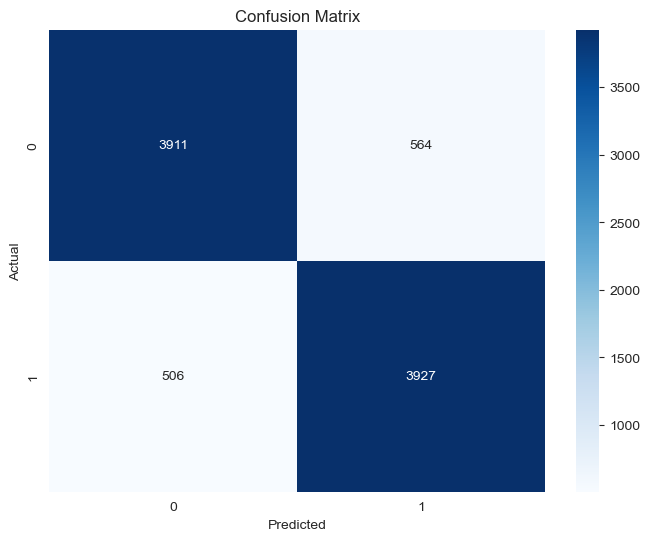

In [81]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Save Model**

In [83]:
joblib.dump(grid_search.best_estimator_,"Census.obj")

['Census.obj']